In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data = './'

In [ ]:
!pip install wget
import wget
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'
wget.download(link)

!unzip -q traffic-signs-data.zip -d $data

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=0094cf573bce77cc7797ca5a712e21cd45c3555de06bf6f5cd440ec0fbc28dc0
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import pickle

train_link = data + 'train.p'
valid_link = data + 'valid.p'
test_link = data + 'test.p'

with open(train_link, mode='rb') as f:
    train = pickle.load(f)
with open(valid_link, mode='rb') as f:
    valid = pickle.load(f)
with open(test_link, mode='rb') as f:
    test = pickle.load(f)

In [ ]:
from sklearn.utils import shuffle

train_X, train_y = shuffle(train['features'], train['labels'])
valid_X, valid_y = valid['features'], valid['labels']
test_X, test_y = test['features'], test['labels']

In [ ]:
train_X.shape

(34799, 32, 32, 3)

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [ ]:
train_X = train_X.astype("float") / 255.0
valid_X = valid_X.astype("float") / 255.0
test_X = test_X.astype("float") / 255.0

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
valid_y = lb.fit_transform(valid_y)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
# Khởi tạo model
model = Sequential()

width = 32
height = 32
classes = 43

shape = (width, height, 3)

In [ ]:
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512))

# Cần có hàm activation sau hàm Dense
model.add(Activation("relu"))
model.add(BatchNormalization())

In [ ]:
model.add(Dense(classes))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [ ]:
# Làm giàu ảnh
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
learning_rate = 0.01
epochs = 10
batch_size = 64
opt = SGD(learning_rate=learning_rate, momentum=0.9)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training
H = model.fit_generator(aug.flow(train_X, train_y, batch_size=batch_size), validation_data=(valid_X, valid_y), 
                        steps_per_epoch=train_X.shape[0]//batch_size, epochs=epochs, verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
543/543 [==============================] - 24s 45ms/step - loss: 2.0550 - accuracy: 0.4024 - val_loss: 1.7803 - val_accuracy: 0.4760
Epoch 2/10
543/543 [==============================] - 24s 44ms/step - loss: 0.9049 - accuracy: 0.6973 - val_loss: 1.2180 - val_accuracy: 0.6231
Epoch 3/10
543/543 [==============================] - 24s 44ms/step - loss: 0.4755 - accuracy: 0.8426 - val_loss: 0.9270 - val_accuracy: 0.7288
Epoch 4/10
543/543 [==============================] - 24s 44ms/step - loss: 0.2685 - accuracy: 0.9119 - val_loss: 0.9639 - val_accuracy: 0.7481
Epoch 5/10
543/543 [==============================] - 24s 44ms/step - loss: 0.1736 - accuracy: 0.9436 - val_loss: 0.8498 - val_accuracy: 0.8005
Epoch 6/10
543/543 [==============================] - 24s 44ms/step - loss: 0.1227 - accuracy: 0.9607 - val_loss: 0.7656 - val_accuracy: 0.7961
Epoch 7/10
543/543 [==============================] - 24s 44

In [ ]:
# Lưu model
model.save('B2.h5') # h5 -- keras

In [ ]:
# Sử dụng model có sẵn
saved_model = tf.keras.models.load_model(data + 'B2.h5')

In [ ]:
result = saved_model.predict(test_X[1:2])

In [ ]:
import numpy as np

final = np.argmax(result)
final = classNames[final]

In [ ]:
final

'Speed limit (30km/h)'

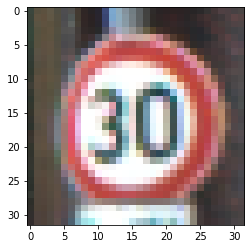

In [ ]:
plt.imshow(test['features'][1])